In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import os
import cv2
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling, BatchNormalization, Concatenate
from tensorflow.keras.models import Model


In [2]:
df=pd.read_csv("/kaggle/input/mine-the-model-celesta-2023/train.csv")
df_image=pd.read_csv
df_test=pd.read_csv("/kaggle/input/mine-the-model-celesta-2023/test.csv")

In [3]:
df.head()

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739


In [4]:
df_test.head()

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,33171 Sea Lion Drive,"Dana Point, CA",1510,2.0,3076
1,3218,4,33 Segovia,"San Clemente, CA",2342,3.0,3218
2,9213,2,1074 TAMARACK Road,"Pinon Hills, CA",2845,3.0,9213
3,10018,4,10989 Coalinga Avenue,"Montclair, CA",2379,3.0,10018
4,11355,4,1128 Custer,"Campo, CA",1836,3.0,11355


In [5]:
df2=df_test

In [6]:
df.shape


(8400, 8)

In [7]:
df2.shape

(3601, 7)

In [8]:
df.info

<bound method DataFrame.info of       index  rooms  retail_price                 address                city  \
0      5832    2.0        299000  81913 Calle Torbellino           Indio, CA   
1      5584    3.0        299000      26076 Fiesta Place           Hemet, CA   
2      9408    5.0        499990  34450 Fawn Ridge Place         Yucaipa, CA   
3      4644    4.0        849900  26481 Montebello Place   Mission Viejo, CA   
4      5739    3.0        333490    2562 Red Spruce Lane     San Jacinto, CA   
...     ...    ...           ...                     ...                 ...   
8395    792    4.0        289990    45228 Lorimer Avenue       Lancaster, CA   
8396  10671    4.0        895000       265 Old Toll Road  Lake Arrowhead, CA   
8397  11650    3.0        479900        5925 Balmoral Dr       San Diego, CA   
8398   2134    4.0        599000   28137 Stonington Lane          Saugus, CA   
8399   6812    5.0        549900      31666 Sundance Way   Lake Elsinore, CA   

       

In [9]:
df.groupby('city')['city'].agg('count')

city
29 Palms, CA           7
Acton, CA             13
Adelanto, CA          20
Agoura Hills, CA       7
Agua Dulce, CA         2
                      ..
Woodland Hills, CA    28
Wrightwood, CA        14
Yorba Linda, CA       44
Yucaipa, CA           65
Yucca Valley, CA      29
Name: city, Length: 351, dtype: int64

In [10]:
df.groupby('rooms')['rooms'].agg('count')

rooms
1.0      109
2.0     1114
3.0     3166
4.0     2623
5.0      963
6.0      177
7.0       41
8.0        8
9.0        1
10.0       2
Name: rooms, dtype: int64

In [11]:
df.isnull().sum()

index             0
rooms           196
retail_price      0
address           0
city              0
sqft            147
toilets           0
image_id          0
dtype: int64

In [12]:
df['rooms']=df['rooms'].fillna(df['rooms'].median())

In [13]:
df['sqft']=df['sqft'].fillna(df['sqft'].median())

In [14]:
df['address']=df['address'].str.split(" ",1).str[1]

In [15]:
df2['address']=df2['address'].str.split(" ",1).str[1]

In [16]:
df.head()

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739


In [17]:
df2.head()

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,Sea Lion Drive,"Dana Point, CA",1510,2.0,3076
1,3218,4,Segovia,"San Clemente, CA",2342,3.0,3218
2,9213,2,TAMARACK Road,"Pinon Hills, CA",2845,3.0,9213
3,10018,4,Coalinga Avenue,"Montclair, CA",2379,3.0,10018
4,11355,4,Custer,"Campo, CA",1836,3.0,11355


In [18]:
df['address'].value_counts()

Calle Aragon             12
Avenida Castilla         10
not provided             10
Avenida Majorca           9
W San Marcos Blvd         7
                         ..
W 53rd Street             1
Myrtlewood Avenue         1
Denver Avenue             1
Grand Traverse Avenue     1
Balmoral Dr               1
Name: address, Length: 6382, dtype: int64

In [19]:
street_frequency=df['address'].value_counts().to_dict()

In [20]:
street_frequency2=df2['address'].value_counts().to_dict()

In [21]:
df=df.replace({'address':street_frequency})

In [22]:
df2=df2.replace({'address':street_frequency2})

In [23]:
df['city'].nunique()

351

In [24]:
df['city'].value_counts()

Los Angeles, CA       273
San Diego, CA         258
La Quinta, CA         219
Lancaster, CA         214
Riverside, CA         189
                     ... 
Hermosa Beach, CA       1
West Hollywood, CA      1
Echo Park, CA           1
Blue Jay, CA            1
San Marino, CA          1
Name: city, Length: 351, dtype: int64

In [25]:
df.head()

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,2,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,3,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,2,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,3,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,1,"San Jacinto, CA",1898.0,2.0,5739


In [26]:
df2.head()

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,1,"Dana Point, CA",1510,2.0,3076
1,3218,4,1,"San Clemente, CA",2342,3.0,3218
2,9213,2,1,"Pinon Hills, CA",2845,3.0,9213
3,10018,4,1,"Montclair, CA",2379,3.0,10018
4,11355,4,1,"Campo, CA",1836,3.0,11355


In [27]:
df['city']=pd.factorize(df['city'])[0]


In [28]:
df2['city']=pd.factorize(df2['city'])[0]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8400 non-null   int64  
 1   rooms         8400 non-null   float64
 2   retail_price  8400 non-null   int64  
 3   address       8400 non-null   int64  
 4   city          8400 non-null   int64  
 5   sqft          8400 non-null   float64
 6   toilets       8400 non-null   float64
 7   image_id      8400 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 525.1 KB


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     3601 non-null   int64  
 1   rooms     3601 non-null   int64  
 2   address   3601 non-null   int64  
 3   city      3601 non-null   int64  
 4   sqft      3601 non-null   int64  
 5   toilets   3601 non-null   float64
 6   image_id  3601 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 197.1 KB


In [31]:
del df['index']

In [32]:
del df2['index']

<AxesSubplot:>

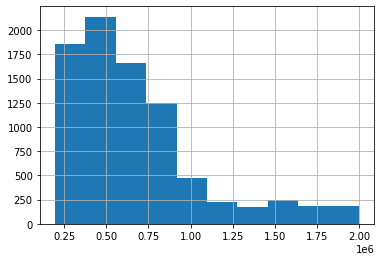

In [33]:
df.retail_price.hist()

In [34]:
df['retail_price']=df.pop('retail_price')

In [35]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), ' % missing values')

In [36]:
for feature in features_with_na:
    data = df.copy()
    
    # Let's make a variable that indicates 1 if observation was missing else 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['retail_price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [37]:
df.head()

,rooms,address,city,sqft,toilets,image_id,retail_price
0,2.0,2,0,1295.0,2.0,5832,299000
1,3.0,3,1,1566.0,2.0,5584,299000
2,5.0,2,2,3068.0,3.0,9408,499990
3,4.0,3,3,2230.0,2.1,4644,849900
4,3.0,1,4,1898.0,2.0,5739,333490


In [38]:
df2.head()

,rooms,address,city,sqft,toilets,image_id
0,3,1,0,1510,2.0,3076
1,4,1,1,2342,3.0,3218
2,2,1,2,2845,3.0,9213
3,4,1,3,2379,3.0,10018
4,4,1,4,1836,3.0,11355


In [39]:
df_features = df.iloc[:, :-1]
df_labels = df.iloc[:, [-1]]

In [40]:
df_features_test=df2.iloc[:,:]

In [41]:
tab_features = df_features.to_numpy()
labels = df_labels.to_numpy()

In [42]:
tab_features_test = df_features_test.to_numpy()

In [43]:
img_dir = '/kaggle/input/mine-the-model-celesta-2023/train_images/train'

img_height = 128
img_width = 128

files = os.listdir(img_dir)
files.sort(key=lambda x: int(x.split('.')[0]))

img_list = []

for file in files:
    img = cv2.imread(os.path.join(img_dir, file))
    img = cv2.resize(img,(img_height, img_width))
    img_list.append(img)
    
img_features = np.asarray(img_list)

In [44]:
img_dir = '/kaggle/input/mine-the-model-celesta-2023/test_images/test'

img_height = 128
img_width = 128

files = os.listdir(img_dir)
files.sort(key=lambda x: int(x.split('.')[0]))

img_list = []

for file in files:
    img = cv2.imread(os.path.join(img_dir, file))
    img = cv2.resize(img,(img_height, img_width))
    img_list.append(img)
    
img_features_test = np.asarray(img_list)

In [45]:
len(img_features)

8400

In [46]:
len(img_features_test)

3601

In [47]:
rng = np.random.default_rng(seed=13)

size = len(tab_features)

p = rng.permutation(size)

tab_features = tab_features[p]
img_features = img_features[p]
labels = labels[p]

In [48]:
rng = np.random.default_rng(seed=13)

size = len(tab_features_test)

p = rng.permutation(size)

tab_features_test = tab_features_test[p]
img_features_test = img_features_test[p]

In [49]:
len(img_features_test)

3601

In [50]:
val_idx = int(size * 0.6)
test_idx = int(size * 0.8)

X_tab_train, X_tab_val, X_tab_test = np.split(tab_features, [val_idx, test_idx])
X_img_train, X_img_val, X_img_test = np.split(img_features, [val_idx, test_idx])
y_train, y_val, y_test = np.split(labels, [val_idx, test_idx])

In [51]:
input_tab = Input(X_tab_train.shape[1])
x_tab = Dense(1024, activation='relu')(input_tab)
x_tab = Dense(1024, activation='relu')(x_tab)

model_tab = Model(input_tab, x_tab)

2023-01-28 18:23:15.212574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:23:15.307165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:23:15.307986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:23:15.309143: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [52]:
input_img = Input((img_height, img_width, 3))
x_img = Rescaling(1./255)(input_img)
x_img = Conv2D(64, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(64, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(128, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(128, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(256, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(256, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(256, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(512, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(512, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(512, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Conv2D(1024, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(1024, 3, padding='same', activation='relu')(x_img)
x_img = Conv2D(1024, 3, padding='same', activation='relu')(x_img)
x_img = MaxPooling2D(padding='same')(x_img)
x_img = BatchNormalization()(x_img)
x_img = Dropout(0.25)(x_img)
x_img = Flatten()(x_img)
x_img = Dense(1024, activation='relu')(x_img)
x_img = Dense(1024, activation='relu')(x_img)

model_img = Model(input_img, x_img)

In [53]:
input = Concatenate()([model_tab.output, model_img.output])
x = Dense(4096, activation='relu')(input)
x = Dropout(0.1)(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1, activation='linear')(x)

model = Model([model_tab.input, model_img.input], x)

model.compile(optimizer='adam', loss='mse',metrics=['mae', 'mape'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        rescaling[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
____________________________________________________________________________________________

In [54]:
epochs = 100
batch_size = 64

early_stopping = EarlyStopping(patience=20, verbose=2, restore_best_weights=True)
    
history = model.fit(
    [X_tab_train, X_img_train], 
    y_train, 
    validation_data=([X_tab_val, X_img_val], y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=early_stopping
)

2023-01-28 18:23:18.379030: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-28 18:23:21.557842: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


34/34 [==============================] - 21s 292ms/step - loss: 217939689472.0000 - mae: 343682.2500 - mape: 55.5345 - val_loss: 123012268032.0000 - val_mae: 246635.6719 - val_mape: 37.8052
Epoch 2/100
34/34 [==============================] - 6s 174ms/step - loss: 107213242368.0000 - mae: 237587.1094 - mape: 40.5106 - val_loss: 616000454656.0000 - val_mae: 722945.8125 - val_mape: 158.4297
Epoch 3/100
34/34 [==============================] - 6s 179ms/step - loss: 112062808064.0000 - mae: 243396.1094 - mape: 41.1236 - val_loss: 130550439936.0000 - val_mae: 292017.3438 - val_mape: 57.4040
Epoch 4/100
34/34 [==============================] - 6s 175ms/step - loss: 104958255104.0000 - mae: 234173.3750 - mape: 40.8458 - val_loss: 117339217920.0000 - val_mae: 255323.0625 - val_mape: 44.7378
Epoch 5/100
34/34 [==============================] - 6s 174ms/step - loss: 101422096384.0000 - mae: 231020.2344 - mape: 40.1110 - val_loss: 132689592320.0000 - val_mae: 246851.6406 - val_mape: 35.2599
Epoch

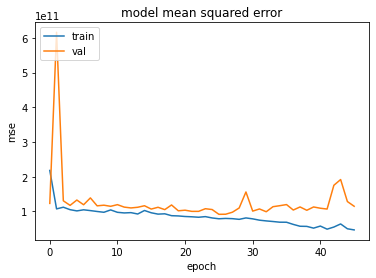

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

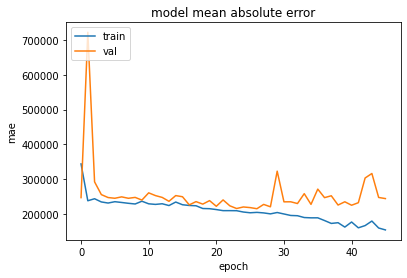

In [56]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

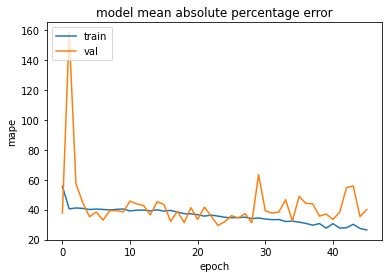

In [57]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model mean absolute percentage error')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
X_tab_test=tab_features_test
X_img_test=img_features_test
y_pred_nn = model.predict([X_tab_test, X_img_test])

In [59]:
def scatterplot_true_and_pred(y_true, y_pred, title) -> None:

    ax = sns.scatterplot(x=y_true.reshape(-1), y=y_pred.reshape(-1))
    ax.set_title(title)
    ax.set(xlabel='True Value', ylabel='Predicted Value')

    max_elem = max([y_true.max(), y_pred.max()])
    diag_values = np.linspace(0, max_elem, 1000)
    plt.plot(diag_values, diag_values, color='magenta', linestyle='--')
    plt.show()

In [60]:
df_test=pd.read_csv("/kaggle/input/mine-the-model-celesta-2023/test.csv")

In [61]:
df_test

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,33171 Sea Lion Drive,"Dana Point, CA",1510,2.0,3076
1,3218,4,33 Segovia,"San Clemente, CA",2342,3.0,3218
2,9213,2,1074 TAMARACK Road,"Pinon Hills, CA",2845,3.0,9213
3,10018,4,10989 Coalinga Avenue,"Montclair, CA",2379,3.0,10018
4,11355,4,1128 Custer,"Campo, CA",1836,3.0,11355
...,...,...,...,...,...,...,...
3596,9421,4,14603 Baylor Avenue,"Chino, CA",2092,2.1,9421
3597,219,3,2301 Woodland Drive,"Pine Mountain Club, CA",2000,2.1,219
3598,10333,5,5771 Jasper Street,"Alta Loma, CA",3002,3.1,10333
3599,2814,3,4490 Lincoln Avenue,"Los Angeles, CA",1811,3.1,2814


In [62]:
y_pred_nn

array([[586993.5 ],
       [649053.  ],
       [669620.56],
       ...,
       [794818.7 ],
       [730811.56],
       [513792.16]], dtype=float32)

In [63]:
y_test.shape

(5520, 1)

In [64]:
df_test["retail_price"]=y_pred_nn

In [65]:
X_tab_test

array([[3.0000e+00, 2.0000e+00, 6.6000e+01, 2.0930e+03, 3.0000e+00,
        5.8500e+03],
       [4.0000e+00, 1.0000e+00, 1.6000e+01, 2.5450e+03, 5.0000e+00,
        1.0084e+04],
       [3.0000e+00, 1.0000e+00, 4.0000e+01, 2.3310e+03, 3.0000e+00,
        6.3560e+03],
       ...,
       [4.0000e+00, 1.0000e+00, 7.7000e+01, 2.1400e+03, 3.0000e+00,
        2.9160e+03],
       [3.0000e+00, 1.0000e+00, 1.3900e+02, 1.6920e+03, 2.0000e+00,
        2.2740e+03],
       [3.0000e+00, 1.0000e+00, 4.4000e+01, 1.2740e+03, 2.0000e+00,
        1.7430e+03]])

In [66]:
df_test

,index,rooms,address,city,sqft,toilets,image_id,retail_price
0,3076,3,33171 Sea Lion Drive,"Dana Point, CA",1510,2.0,3076,586993.50000
1,3218,4,33 Segovia,"San Clemente, CA",2342,3.0,3218,649053.00000
2,9213,2,1074 TAMARACK Road,"Pinon Hills, CA",2845,3.0,9213,669620.56250
3,10018,4,10989 Coalinga Avenue,"Montclair, CA",2379,3.0,10018,442856.53125
4,11355,4,1128 Custer,"Campo, CA",1836,3.0,11355,397263.96875
...,...,...,...,...,...,...,...,...
3596,9421,4,14603 Baylor Avenue,"Chino, CA",2092,2.1,9421,584338.87500
3597,219,3,2301 Woodland Drive,"Pine Mountain Club, CA",2000,2.1,219,305081.96875
3598,10333,5,5771 Jasper Street,"Alta Loma, CA",3002,3.1,10333,794818.68750
3599,2814,3,4490 Lincoln Avenue,"Los Angeles, CA",1811,3.1,2814,730811.56250


In [67]:
df_sub=df_test.drop(['rooms','address','city','sqft','toilets','image_id'],axis=1)

In [68]:
df_sub.to_csv("sample_prediction.csv")

In [69]:
df_sub

,index,retail_price
0,3076,586993.50000
1,3218,649053.00000
2,9213,669620.56250
3,10018,442856.53125
4,11355,397263.96875
...,...,...
3596,9421,584338.87500
3597,219,305081.96875
3598,10333,794818.68750
3599,2814,730811.56250
